In [35]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import io

print(tf.__version__)

2.9.1


In [38]:
## Helpers

def plot_image(predictions_array, img):
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap=plt.cm.binary) 
  plt.subplot(1,2,2)
  plt.xticks(rotation=45)
  plt.bar(class_names,predictions_array)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # load dataset

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # set labels

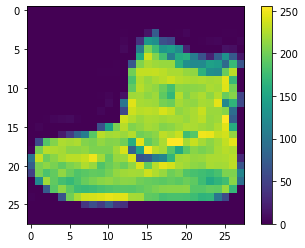

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show() # the image pixel values range between 0 to 255

In [6]:
train_images = train_images/255
test_images = test_images/255 # normalize pixel value to range between 0 and 1

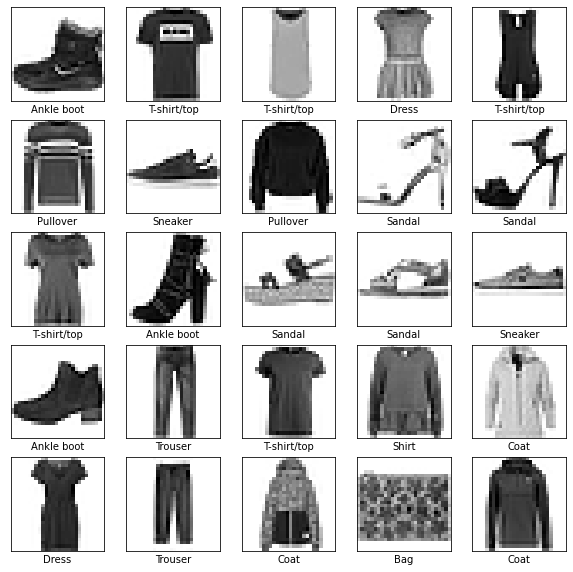

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show() # plot first 25 images for the heck of it

In [8]:
model = tf.keras.Sequential([ # build a model
    tf.keras.layers.Flatten(input_shape=(28, 28)), # set the input layer to the expected input size
    tf.keras.layers.Dense(128, activation='relu'), # add a dense layer with 128 perceptrons with Relu activation
    tf.keras.layers.Dense(10) # add the final layer with 10 perceptron
]) 

2022-06-01 10:34:18.912218: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-01 10:34:18.915307: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 10:34:18.915367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-01 10:34:18.915414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-01 10:34:18.932873: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [13]:
model.compile(optimizer='adam', # set optimizer to adam 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # set a categorical entropy loss function
              metrics=['accuracy']) #set metric to accuracy

In [14]:
model.fit(train_images, train_labels, epochs=10) # fit the model, run 10 iterations

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2311 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2243 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2195 - accuracy: 0.9170
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2122 - accuracy: 0.9201
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2040 - accuracy: 0.9229
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1994 - accuracy: 0.9247
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1941 - accuracy: 0.9260
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1910 - accuracy: 0.9282
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1858 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.179

In [15]:
model.save("./model_weights/simpleReluModel.h5") # save the model

In [18]:
model = tf.keras.models.load_model('./model_weights/simpleReluModel.h5') # load the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) # evaluate the model and print results

print('\nTest accuracy:', test_acc) # print accuracy  

313/313 - 0s - loss: 0.3719 - accuracy: 0.8854 - 337ms/epoch - 1ms/step

Test accuracy: 0.8853999972343445


In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) #attach a sofmax to the final layer 

In [20]:
predictions = probability_model.predict(test_images) # classify the images from test set

313/313 [==============================] - 0s 925us/step


In [21]:
predictions.shape # predictions array contains probabilities for 1000 images against 10 classess

(10000, 10)

In [39]:
# classifying and visualising results
img = image
input = (np.expand_dims(img,0))
predictions_single = probability_model.predict(input)
plot_image(predictions_single[0],img)

1/1 [==============================] - 0s 20ms/step


AttributeError: 'Figure' object has no attribute 'subplot'

In [31]:
path = "../flaskapp/test_images/35x45-1.jpg"
image = tf.keras.utils.load_img(
         path,
         grayscale=True,
         color_mode='rgb',
         target_size=(28,28),
         interpolation='nearest',
         keep_aspect_ratio=True
      )

/home/radheem/.local/lib/python3.8/site-packages/keras/utils/image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 19ms/step


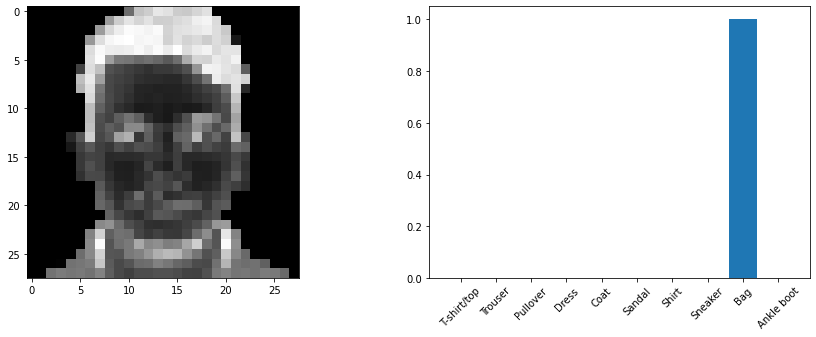

In [34]:
input = (np.expand_dims(image,0))
predictions_single = probability_model.predict(input)
plot_image(predictions_single[0],image)